In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np

# Центральная предельная теорема своими руками
## Распределение арксинуса

В эксперименте мы рассмотрим распределение арксинуса и применим к нему центральную предельную теорему (**ЦПТ**).

Смысл теоремы в том, что при известных условиях любое распределение в пределе переходит в нормальное.
Имеем сумму $X=\sum_{i=1}^{n}x_{i}$, где $x_{i} - $ статически независимые случайные величины с плотностями вероятностей $f(x_i)$, конечными средними $m_{x_i}$ и дисперсиями $D_{x_i}$. Тогда, согласно ЦПТ, справедливо положение, что при некоторых легко осуществимых условиях и при $n\to \infty$ распределение $f(x)$ суммы случайных величин независимо от распределения $f(x_i)$ каждой из них приближается к функции плотности нормального распределения.

## Распределение с произвольными границами
$-\infty < a < b < \infty \,$
### Плотность вероятности
$f(x) = \frac{1}{\pi\sqrt{(x-a)(b-x)}}$
### Функция распределения
$F(x) = \frac{2}{\pi}\arcsin\left(\sqrt \frac{x-a}{b-a} \right)$
### Математическое ожидание
$mean = \frac{a+b}{2}$
### Медиана
$median = \frac{a+b}{2}$

Text(0, 0.5, '$f(x)$')

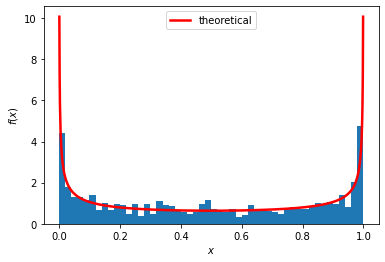

In [2]:
a, b = 0, 1
# Выбираем распределение арксинуса
rv_arc_sine = sts.arcsine(a, b)
sample = rv_arc_sine.rvs(1000)

# рассчитаем теоретическую плотность вероятности (pdf - probability density function) для распределения
x = np.linspace(a, b, 1000)
pdf = rv_arc_sine.pdf(x)

# построим гистограмму выборки и наложим на нее теоретическую оценку плотности вероятности экспоненциального распределения
plt.plot(x, pdf, 'r-', label='theoretical', linewidth=2.5)
plt.legend()
plt.hist(sample, bins=50, density=True)

plt.xlabel('$x$')
plt.ylabel('$f(x)$')

Напишем функцию, которая будет генерировать выборку $n$ и строить гистограмму ее средних значений (т.е. случайную величину $X$).
Используя библиотеку статистики, мы построим график нормального распределения. Для этого нам нужно будет знать математическое ожидание нашей случайной величины и ее стандартное отклонение.

Матожидание выборки объема 3: 0.5050
Матожидание НР: 0.5000
Среднее квадратичное отклонение выборки объема 3: 0.2041
Среднее квадратичное отклонение НР: 0.2041


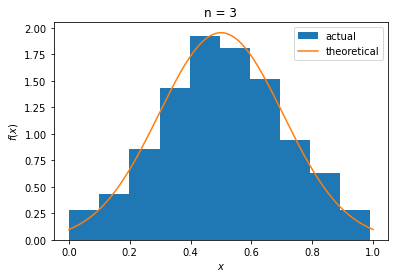

Матожидание выборки объема 5: 0.4980
Матожидание НР: 0.5000
Среднее квадратичное отклонение выборки объема 5: 0.1555
Среднее квадратичное отклонение НР: 0.1581


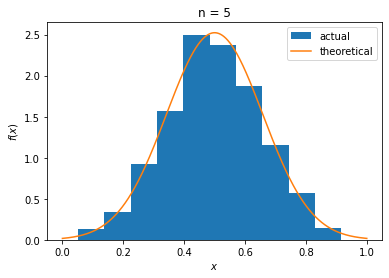

Матожидание выборки объема 10: 0.4986
Матожидание НР: 0.5000
Среднее квадратичное отклонение выборки объема 10: 0.1121
Среднее квадратичное отклонение НР: 0.1118


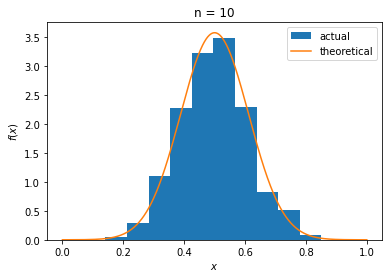

Матожидание выборки объема 50: 0.5001
Матожидание НР: 0.5000
Среднее квадратичное отклонение выборки объема 50: 0.0490
Среднее квадратичное отклонение НР: 0.0500


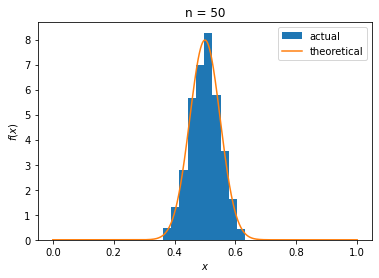

Матожидание выборки объема 200: 0.5011
Матожидание НР: 0.5000
Среднее квадратичное отклонение выборки объема 200: 0.0257
Среднее квадратичное отклонение НР: 0.0250


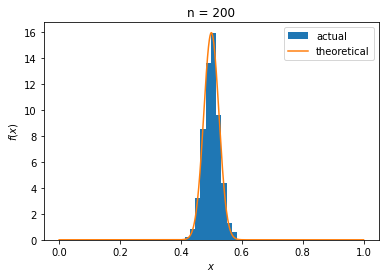

In [3]:
def generate_pdf(n):
    means = [np.mean(rv_arc_sine.rvs(n)) for _ in range(1000)]

    mu = (a + b) / 2  # theoretical expectation
    mu_means = np.mean(means)

    variance = 1 / 8 * (b - a) ** 2
    sigma = (variance / n) ** 0.5  # theoretical sigma
    sigma_test = np.std(means, ddof=0)  # theoretical sigma
    sigma_means = np.std(means, ddof=1)

    norm_rv = sts.norm(mu, sigma)
    x = np.linspace(a, b, 1000)
    pdf = norm_rv.pdf(x)

    print("Матожидание выборки объема %d: %.4f" % (n, mu_means))
    print("Матожидание НР: %.4f" % mu)
    print("Среднее квадратичное отклонение выборки объема %d: %.4f" % (n, sigma_means))
    print("Среднее квадратичное отклонение НР: %.4f" % sigma)

    plt.hist(means, density=True, label='actual')
    plt.plot(x, pdf, label='theoretical')

    plt.legend()
    plt.xlabel('$x$')
    plt.ylabel('$f(x)$')
    plt.title('n = %d' % n)
    plt.show()


# построим гистограммы распределений выборочных средних и приближающих их нормальных распределений при различных объемах выборок n
for n in [3, 5, 10, 50, 200]:
    generate_pdf(n)

## Вывод

Эксперимент показал, гистограмма сгенерированных выборок близко аппроксимирует график нормального распределения, построенный с использованием центральной предельной теоремы. Значения математических ожиданий и стандартных отклонений близки и практически совпадают.

Эксперимент подтвердил теорию тем, что для распределения арксинуса центральная предельная теорема работает с высокой точностью и при небольшом размере выборки.